<a href="https://colab.research.google.com/github/SanthoshNagaraj94/ADOPTED-USER-ANALYSIS/blob/main/Assignment_3_santhosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSERY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set()

IMPORTING TAKE HOME USERS DATA USING PD.READ_CSV
AND VISUAVALIZE THE HEAD VALUES


In [ ]:
takehome_users=pd.read_csv('takehome_users.csv', sep=',' , encoding='latin-1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


VISUVALIZE THE INFORMATION OF TAKE HOME USER DATA FRAME USING .INFO()

In [ ]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


VISUVALIZE THE SHAPE OF TAKE HOME USER DATA FRAME USNING .SHAPE

In [ ]:
takehome_users.shape

(12000, 10)

IMPORTING TAKE HOME USERS ENGAGMENT DATA USING PD.READ_CSV AND VISUAVALIZE THE HEAD VALUES

In [ ]:
takehome_user_engagement=pd.read_csv("takehome_user_engagement.csv")
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


GROUP BY USER ID AND COUNT THE NUMBER OF VISITED BY INDIDUAL USERS

In [ ]:
con=takehome_user_engagement.groupby("user_id")['visited'].sum()
con.head()

user_id
1     1
2    14
3     1
4     1
5     1
Name: visited, dtype: int64

In [ ]:
con.to_csv("NO-OF TIMES USER VISITED.csv")

In [ ]:
counts=pd.read_csv('NO-OF TIMES USER VISITED.csv')

In [ ]:
counts.head(10)

,user_id,visited
0,1,1
1,2,14
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,10,284
8,11,1
9,13,1


CHANGE THE OBJECT_ID TO USER_ID

In [ ]:
takehome_users.rename({"object_id": "user_id"}, axis='columns',inplace=True)

In [ ]:
takehome_users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


MERGING THE TAKE HOME USER ENGAGMENT FREQUENCEY TO TAKE HOME USER TABLE BY MERGE FUNCTION

In [ ]:
new_data=pd.merge(takehome_users,counts, on='user_id',how='outer')


In [ ]:
new_data.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,1.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,284.0


In [ ]:
new_data.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
visited                       float64
dtype: object

In [ ]:
new_data.isna().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
visited                       3177
dtype: int64

FILLING 0 IN THE NaN VALUES

In [ ]:
new_data.fillna(0,inplace=True)

In [ ]:
new_data['visited']=new_data['visited'].astype('int64')

In [ ]:
new_data.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1


In [ ]:
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


CONVERTING THE TIME STAMP INTO DAY, MONTH ,YEAR AND WEEK

In [ ]:
takehome_user_engagement['Date']=pd.DatetimeIndex(takehome_user_engagement.time_stamp).day

In [ ]:
takehome_user_engagement['Month']=pd.DatetimeIndex(takehome_user_engagement.time_stamp).month
takehome_user_engagement['Year']=pd.DatetimeIndex(takehome_user_engagement.time_stamp).year.astype('object')
takehome_user_engagement['Week']=pd.DatetimeIndex(takehome_user_engagement.time_stamp).week.astype('object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


CONVERTED TABLE SAVE INTO DATE1.CSV

In [ ]:
takehome_user_engagement.to_csv("Date1.csv")


In [ ]:
takehome_user_engagement.head()

,time_stamp,user_id,visited,Date,Month,Year,Week
0,2014-04-22 03:53:30,1,1,22,4,2014,17
1,2013-11-15 03:45:04,2,1,15,11,2013,46
2,2013-11-29 03:45:04,2,1,29,11,2013,48
3,2013-12-09 03:45:04,2,1,9,12,2013,50
4,2013-12-25 03:45:04,2,1,25,12,2013,52


In [ ]:
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
 3   Date        207917 non-null  int64 
 4   Month       207917 non-null  int64 
 5   Year        207917 non-null  object
 6   Week        207917 non-null  object
dtypes: int64(4), object(3)
memory usage: 11.1+ MB


CONCATENATE THE WEEK AND YEAR TO GET THE UNIQE VALUES TO FIND THE NUMBER OF VISIT PER WEEK

In [ ]:
takehome_user_engagement['dummy']=takehome_user_engagement['Year'].astype(str)+takehome_user_engagement['Week'].astype(str)


In [ ]:
takehome_user_engagement.head()

,time_stamp,user_id,visited,Date,Month,Year,Week,dummy
0,2014-04-22 03:53:30,1,1,22,4,2014,17,201417
1,2013-11-15 03:45:04,2,1,15,11,2013,46,201346
2,2013-11-29 03:45:04,2,1,29,11,2013,48,201348
3,2013-12-09 03:45:04,2,1,9,12,2013,50,201350
4,2013-12-25 03:45:04,2,1,25,12,2013,52,201352


THIS IS USE TO FIND THE NUMBER OF VIST ATLEAST 3 TIMES PER WEEK

In [ ]:
m=takehome_user_engagement.groupby(['user_id','dummy'])['dummy'].count()>=3

In [ ]:
m.to_csv("new.csv")

In [ ]:
visit_week_gt3=pd.read_csv("new.csv")
visit_week_gt3.head(50)

,user_id,dummy,dummy.1
0,1,201417,False
1,2,20131,False
2,2,201346,False
3,2,201348,False
4,2,201350,False
5,2,201352,False
6,2,201410,False
7,2,201411,False
8,2,201414,False
9,2,20142,False


In [ ]:
visit_week_gt3.drop(['dummy'],axis=1,inplace=True)

In [ ]:
visit_week_gt3['dummy.1'] = visit_week_gt3['dummy.1'].astype(int)

In [ ]:
gb=visit_week_gt3.groupby('user_id')['dummy.1'].count()-1

In [ ]:
gb=gb.astype(int)

In [ ]:
final=pd.merge(new_data,gb, on='user_id',how='outer')

ADDING THE TOTAL NUMBER OF VISIT BY USER AND COUNT OF NUMBER OF VISIT GREATER THAN OR EQUAL TO THREE PER WEEK

In [ ]:
final.fillna(0)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,dummy.1
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14,10.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,1,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,1,0.0


In [ ]:
final["dummy.1"]=final["dummy.1"].fillna(0).astype(int)

In [ ]:
final['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [ ]:
final.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,dummy.1
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14,10
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,0


In [ ]:
final["TOTAL_NO_OF_VISITS"]=final["visited"].replace('TOTAL_NO_OF_VISITS')

In [ ]:
final.rename(columns={'dummy.1':'NO_OF COUNT>3_PER_WEEK',
                      'visited':'TOTAL_NO_OF_VISITS',},inplace=True)


In [ ]:
final_sort=final.sort_values('NO_OF COUNT>3_PER_WEEK',ascending=False)

In [ ]:
final_sort.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,TOTAL_NO_OF_VISITS,NO_OF COUNT>3_PER_WEEK,TOTAL_NO_OF_VISITS
7589,7590,2012-06-08 00:51:13,Ferreira Rebeca,ffickuvv@qqgix.com,PERSONAL_PROJECTS,1.401843e+09,0,0,225,0.0,590,104,590
9401,9402,2012-06-16 13:23:57,Molloy Alex,AlexMolloy@yahoo.com,ORG_INVITE,1.401802e+09,0,0,317,879.0,581,103,581
5296,5297,2012-06-10 17:32:09,Follett Joseph,JosephFollett@yahoo.com,GUEST_INVITE,1.401903e+09,0,0,69,5577.0,520,101,520
905,906,2012-06-17 22:49:52,Becker Jessika,JessikaBecker@gmail.com,SIGNUP_GOOGLE_AUTH,1.401922e+09,0,0,358,0.0,600,101,600
6977,6978,2012-06-18 15:25:52,Pinto Emily,EmilyGoncalvesPinto@gmail.com,PERSONAL_PROJECTS,1.401896e+09,0,0,194,0.0,383,101,383


In [ ]:
final_sort.tail()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,TOTAL_NO_OF_VISITS,NO_OF COUNT>3_PER_WEEK,TOTAL_NO_OF_VISITS
4470,4471,2013-11-25 01:54:30,Jespersen Johanne,JohanneBJespersen@gmail.com,SIGNUP,1.385776e+09,0,0,51,0.0,1,0,1
4472,4473,2012-10-12 20:58:57,Trethowan Alexander,AlexanderTrethowan@gustr.com,GUEST_INVITE,1.350508e+09,1,1,76,8504.0,1,0,1
4474,4475,2013-01-22 09:09:44,Cavalcanti Ana,AnaPintoCavalcanti@jourrapide.com,PERSONAL_PROJECTS,0.000000e+00,0,0,152,0.0,0,0,0
4475,4476,2012-07-25 16:20:55,Jeppesen Mimir,MimirLJeppesen@yahoo.com,SIGNUP,1.343233e+09,0,0,414,0.0,1,0,1
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,0.0,1,0,1


In [ ]:
creation_source=final.creation_source.value_counts()
creation_source

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [ ]:
final['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

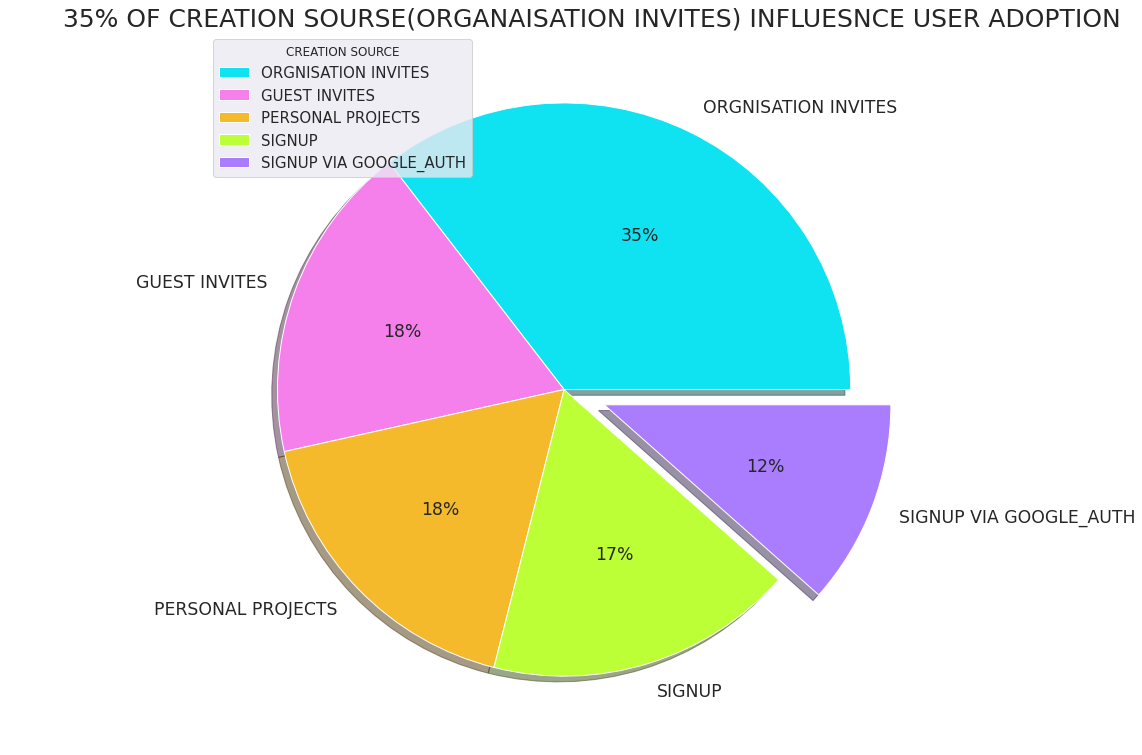

In [ ]:
CS = creation_source
mylabels = ["ORGNISATION INVITES","GUEST INVITES","PERSONAL PROJECTS","SIGNUP","SIGNUP VIA GOOGLE_AUTH"]

myexplode = [0,0,0,0,0.15]
fig = plt.figure(figsize =(15, 15))
plt.pie(CS, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.0f%%',textprops={'size': 'x-large'},colors=['#0fe3f2','#f57feb','#f5b92c','#bcff36','#aa7dff'])
plt.title('       35% OF CREATION SOURSE(ORGANAISATION INVITES) INFLUESNCE USER ADOPTION',fontsize=25)
plt.legend(title = "CREATION SOURCE",prop={'size': 15},loc='upper left')
plt.tight_layout()
plt.savefig("35% OF CREATION SOURSE(ORGANAISATION INVITES) INFLUESNCE USER ADOPTION.jpg") 

In [ ]:
from sklearn import preprocessing
 
LE = preprocessing.LabelEncoder()
 
final['creation_source']=LE.fit_transform(final['creation_source'])
 

final['creation_source'].unique()

array([0, 1, 3, 2, 4])

In [ ]:

opted_in_to_mailing_list=final.opted_in_to_mailing_list.value_counts()
opted_in_to_mailing_list

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

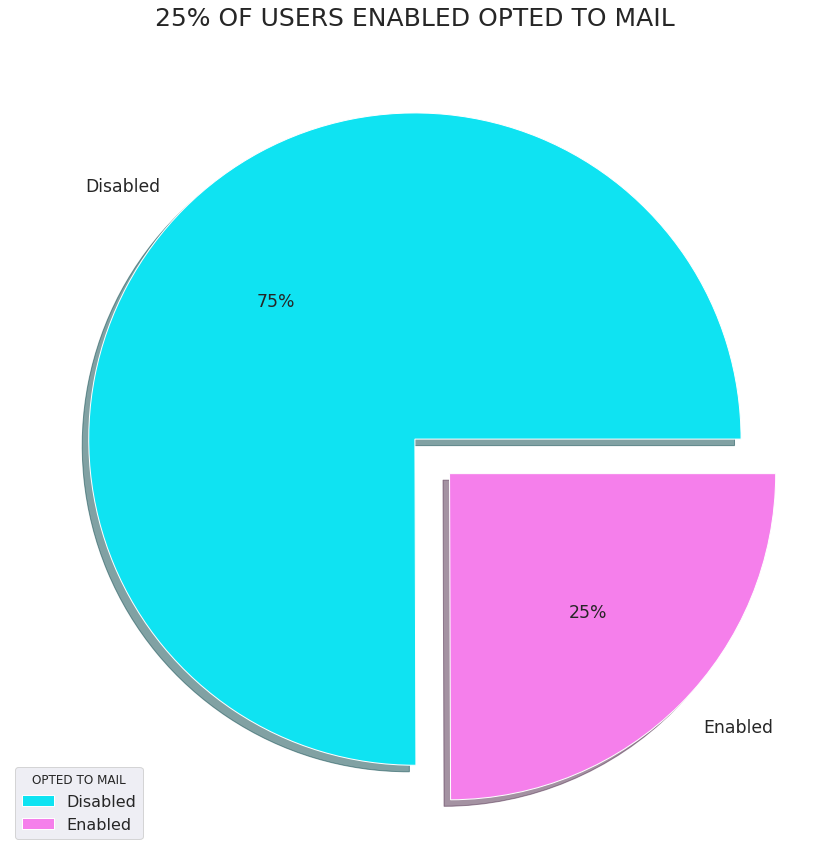

In [ ]:
y = opted_in_to_mailing_list
mylabels = ["Disabled", "Enabled"]

myexplode = [0, 0.15]
fig = plt.figure(figsize =(15, 15))
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.0f%%',textprops={'size': 'x-large'},colors=['#0fe3f2','#f57feb'])
plt.title('25% OF USERS ENABLED OPTED TO MAIL',fontsize=25)
plt.legend(title = "OPTED TO MAIL",prop={'size': 16},loc='lower left')

plt.savefig("25% OF USERS ENABLED OPTED TO MAIL.jpg") 

In [ ]:

enabled_for_marketing_drip=final.enabled_for_marketing_drip.value_counts()
enabled_for_marketing_drip

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

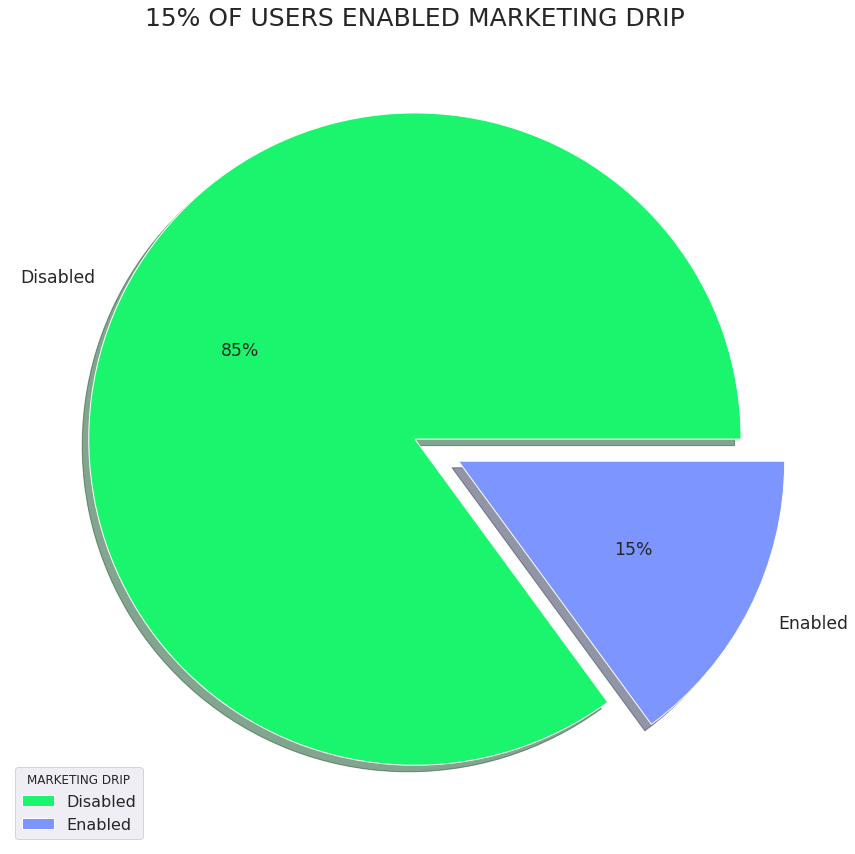

In [260]:
y = enabled_for_marketing_drip
mylabels = ["Disabled", "Enabled"]

myexplode = [0, 0.15]
fig = plt.figure(figsize =(15, 15))
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.0f%%',textprops={'size': 'x-large'},colors=['#1bf56e','#7d95ff'])
plt.title('15% OF USERS ENABLED MARKETING DRIP',fontsize=25)
plt.legend(title = "MARKETING DRIP",prop={'size': 16},loc='lower left')


plt.savefig("15% OF USERS ENABLED MAIL DRIP.jpg") 

invited_by_user_id

In [ ]:
invited_by_user_id=final.invited_by_user_id.value_counts()
invited_by_user_id


0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
           ... 
7941.0        1
4134.0        1
6101.0        1
129.0         1
594.0         1
Name: invited_by_user_id, Length: 2565, dtype: int64

In [ ]:
final.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,TOTAL_NO_OF_VISITS,NO_OF COUNT>3_PER_WEEK,TOTAL_NO_OF_VISITS
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,1.398139e+09,1,0,11,10803.0,1,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,1.396238e+09,0,0,1,316.0,14,10,14
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,1.363735e+09,0,0,94,1525.0,1,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,1.369210e+09,0,0,1,5151.0,1,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,1.358850e+09,0,0,193,5240.0,1,0,1


In [ ]:
from datetime import datetime

In [ ]:
final['last_session_creation_time'] = pd.to_datetime(final['last_session_creation_time'],unit='s')

In [ ]:
final.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,TOTAL_NO_OF_VISITS,NO_OF COUNT>3_PER_WEEK,TOTAL_NO_OF_VISITS
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,1,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,14,10,14
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,1,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,5151.0,1,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5240.0,1,0,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,0,2013-12-19 03:37:06,0,0,197,11241.0,1,0,1
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,3,2012-12-20 13:24:32,0,1,37,0.0,1,0,1
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,2,1970-01-01 00:00:00,1,1,74,0.0,0,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,2,1970-01-01 00:00:00,0,0,302,0.0,0,0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1,2014-06-03 22:08:03,1,1,318,4143.0,284,73,284


In [ ]:
final['creation_time']=pd.to_datetime(final['creation_time'])

In [ ]:
final['Time_span']=(final['last_session_creation_time']-final['creation_time']).dt.days

In [ ]:
final.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,TOTAL_NO_OF_VISITS,NO_OF COUNT>3_PER_WEEK,TOTAL_NO_OF_VISITS,Time_span
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,1,0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,14,10,14,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,1,0,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,5151.0,1,0,1,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5240.0,1,0,1,5


In [ ]:
final['adopted']=(final['NO_OF COUNT>3_PER_WEEK']>0).astype(int)

In [ ]:
final[final['Time_span'] < 0] = 0

In [ ]:
final.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,TOTAL_NO_OF_VISITS,NO_OF COUNT>3_PER_WEEK,TOTAL_NO_OF_VISITS,Time_span,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,1,0,1,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,14,10,14,136,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,1,0,1,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,5151.0,1,0,1,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5240.0,1,0,1,5,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,0,2013-12-19 03:37:06,0,0,197,11241.0,1,0,1,2,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,3,2012-12-20 13:24:32,0,1,37,0.0,1,0,1,4,0
7,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1,2014-06-03 22:08:03,1,1,318,4143.0,284,73,284,503,1


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
final.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,TOTAL_NO_OF_VISITS,NO_OF COUNT>3_PER_WEEK,TOTAL_NO_OF_VISITS,Time_span,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,1,0,1,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,14,10,14,136,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,1,0,1,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,5151.0,1,0,1,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5240.0,1,0,1,5,0


In [ ]:
x=final[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'Time_span']]
y=final[['adopted']]

In [ ]:
final.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                 int64
last_session_creation_time     object
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
TOTAL_NO_OF_VISITS              int64
NO_OF COUNT>3_PER_WEEK          int64
TOTAL_NO_OF_VISITS              int64
Time_span                       int64
adopted                         int64
dtype: object

In [ ]:
final.isna().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
TOTAL_NO_OF_VISITS            0
NO_OF COUNT>3_PER_WEEK        0
TOTAL_NO_OF_VISITS            0
Time_span                     0
adopted                       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=5)

In [ ]:
lo_Reg=LogisticRegression()

In [ ]:
train=lo_Reg.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_predict=lo_Reg.predict(x_test)

In [ ]:
y_predict

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:

from sklearn.metrics import accuracy_score

accuracy_score(y_predict,y_test)

0.9954166666666666

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1902
           1       0.99      0.99      0.99       498

    accuracy                           1.00      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       1.00      1.00      1.00      2400



In [ ]:
test=[]
for x in y_test['adopted']:
  test.append(x)

In [ ]:
predict=[]
for x in y_predict:
  predict.append(x)

In [ ]:
predict_VS_test=pd.DataFrame(list(zip(test,predict)),columns =['Test', 'Predict'])

In [ ]:
predict_VS_test.to_csv('predict_VS_test.csv')

In [259]:
print("REGRESSION CO-EFFICIENT=",lo_Reg.coef_, "\nINTERCEPT\t\t=",lo_Reg.intercept_)

REGRESSION CO-EFFICIENT= [[-0.15446028 -0.14785362  0.08701948  1.02253987]] 
INTERCEPT		= [-7.64831909]
